In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
weights_input_hidden = np.random.uniform(-1, 1, (196, 784))
biases_input_hidden = np.random.uniform(-0.5, 0.5, (196, 1))
        
    
weights_hidden_output = np.random.uniform(-1, 1, (10, 196))
biases_hidden_output = np.random.uniform(-0.5, 0.5, (10, 1))


class Model:
    def s

In [3]:
import numpy as np

class Model:
    def __init__(self, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output):
        self.weights_input_hidden = weights_input_hidden
        self.biases_input_hidden = biases_input_hidden
        self.weights_hidden_output = weights_hidden_output
        self.biases_hidden_output = biases_hidden_output
        self.correct = 0
        self.learningrate = 0.1

    def relu(self, x):
        return np.maximum(0, x)

    def reluderivative(self, x):
        return np.where(x > 0, 1, 0)

    def forward_back(self, answer, inp):
        hidden_output = self.relu(self.weights_input_hidden @ inp + self.biases_input_hidden)
        output = self.relu(self.weights_hidden_output @ hidden_output + self.biases_hidden_output)

        delta_out = (output - answer) * self.reluderivative(output)
        self.weights_hidden_output -= delta_out @ hidden_output.T * self.learningrate
        self.biases_hidden_output -= delta_out

        delta_hidden = self.weights_hidden_output.T @ delta_out * self.reluderivative(hidden_output)
        self.weights_input_hidden -= delta_hidden @ inp.T * self.learningrate
        self.biases_input_hidden -= delta_hidden * self.learningrate

        return output

    def train(self, data_train, data_dev):
        for epochs in range(1):
            for data in data_train:
                answer = np.zeros((10, 1))
                answer[data[0], 0] = 1
                input_data = data[1:]
                input_data.shape += (1,)
                self.forward_back(answer, input_data)
        for data in data_dev:
            answer = np.zeros((10, 1))
            answer[data[0], 0] = 1
            input_data = data[1:]
            input_data.shape += (1,)
            output = self.forward_back(answer, input_data)
            prediction = np.argmax(output)
            if prediction == data[0]:
                self.correct += 1
        
data = np.array(data)
np.random.shuffle(data)
m, n = data.shape

data_dev = data[0:1000]
data_train = data[1000:m]


# Create an instance of the Model class
test = Model(weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output)

test.train(data_train,data_dev)
print(test.correct)
print(test.correct/1000)





94
0.094


Predicted Class: 0
Correct Class: 1


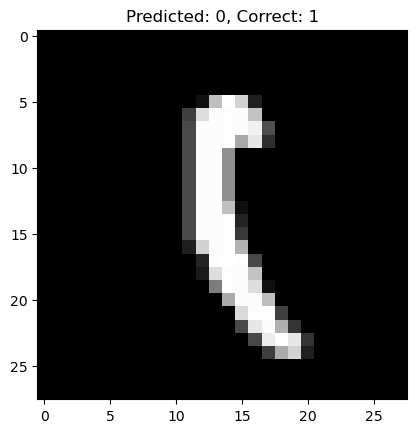

In [4]:
import matplotlib.pyplot as plt
example_index = 38  # Choose the index of the example you want to test

example_data = data_dev[example_index]
correct_label = example_data[0]
input_data = example_data[1:]
input_data.shape += (1,)

# Convert correct label to one-hot encoding
answer = np.zeros((10, 1))
answer[correct_label, 0] = 1

# Calculate the network's output
output = test.forward_back(answer, input_data)
# Get the predicted class
predicted_class = np.argmax(output)

print("Predicted Class:", predicted_class)
print("Correct Class:", correct_label)
image = input_data.reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted: {predicted_class}, Correct: {correct_label}")
plt.show()